In [1]:
from adodbapi.ado_consts import directions
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import multiprocessing
import sys
import cartopy.feature as cfeature
import cmaps
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tq
import xarray as xr
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 专门提供经纬度的
from cartopy.util import add_cyclic_point
from matplotlib import gridspec
from matplotlib import ticker
from matplotlib.pyplot import quiverkey
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import filters

from toolbar.significance_test import corr_test
from toolbar.TN_WaveActivityFlux import TN_WAF_3D
from toolbar.curved_quivers.modplot import *
from toolbar.data_read import *


K_type = xr.open_dataset(r"D:/PyFile/p2/data/Time_type_AverFiltAll0.9%_0.3%_3.nc")
# z
z_low = era5_p("E:/data/ERA5/ERA5_pressLev/era5_pressLev.nc", 1960, 2022, [200, 500, 850], 'z')
z_high = era5_hp("E:/data/ERA5/ERA5_pressLev/era5_pressLev_high.nc", 1961, 2022, [100, 150], 'z')
z = xr.concat([z_high, z_low], dim='level')
# u
u_low = era5_p("E:/data/ERA5/ERA5_pressLev/era5_pressLev.nc", 1960, 2022, [200, 500, 850], 'u')
u_high = era5_hp("E:/data/ERA5/ERA5_pressLev/era5_pressLev_high.nc", 1961, 2022, [100, 150], 'u')
u = xr.concat([u_high, u_low], dim='level')
# v
v_low = era5_p("E:/data/ERA5/ERA5_pressLev/era5_pressLev.nc", 1960, 2022, [200, 500, 850], 'v')
v_high = era5_hp("E:/data/ERA5/ERA5_pressLev/era5_pressLev_high.nc", 1961, 2022, [100, 150], 'v')
v = xr.concat([v_high, v_low], dim='level')
# t
t_low = era5_p("E:/data/ERA5/ERA5_pressLev/era5_pressLev.nc", 1960, 2022, [200, 500, 850], 't')
t_high = era5_hp("E:/data/ERA5/ERA5_pressLev/era5_pressLev_high.nc", 1960, 2022, [100, 150], 't')
t = xr.concat([t_high, t_low], dim='level')
# pre
pre = prec("E:/data/NOAA/PREC/precip.mon.anom.nc", 1960, 2022)
# sst
sst = ersst("E:/data/NOAA/ERSSTv5/sst.mnmean.nc", 1960, 2022)

  0%|          | 0/3 [00:00<?, ?it/s]D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 181/181 [00:00<00:00, 317.64条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:01<00:00, 391.01条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:01<00:00, 363.51条/s]


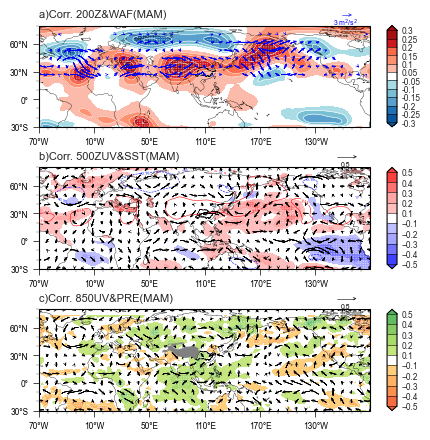

 33%|███▎      | 1/3 [02:05<04:11, 125.88s/it]D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 158/158 [00:00<00:00, 401.44条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:00<00:00, 497.47条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:00<00:00, 489.84条/s]


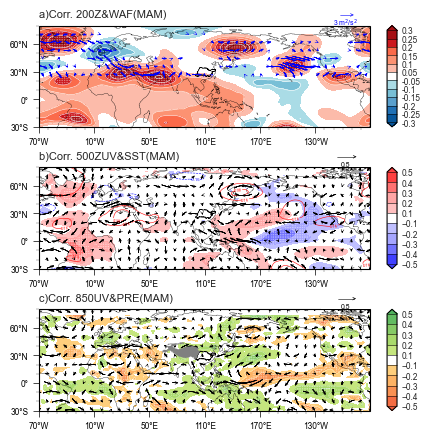

 67%|██████▋   | 2/3 [03:57<01:57, 117.59s/it]D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 184/184 [00:00<00:00, 559.18条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:00<00:00, 549.66条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:00<00:00, 539.24条/s]


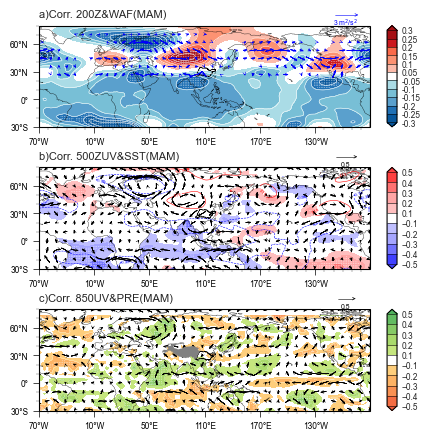

100%|██████████| 3/3 [05:55<00:00, 118.36s/it]


In [5]:
Z = z.sel(time=slice('1961-01-01', '2022-12-31'))
Z = Z.sel(time=Z['time.month'].isin([3, 4, 5])).groupby('time.year').mean('time').transpose('year', 'level', 'lat', 'lon')
U = u.sel(time=slice('1961-01-01', '2022-12-31'))
U = U.sel(time=U['time.month'].isin([3, 4, 5])).groupby('time.year').mean('time').transpose('year', 'level', 'lat', 'lon')
V = v.sel(time=slice('1961-01-01', '2022-12-31'))
V = V.sel(time=V['time.month'].isin([3, 4, 5])).groupby('time.year').mean('time').transpose('year', 'level', 'lat', 'lon')
T = t.sel(time=slice('1961-01-01', '2022-12-31'))
T = T.sel(time=T['time.month'].isin([3, 4, 5])).groupby('time.year').mean('time').transpose('year', 'level', 'lat', 'lon')
Pre = pre.sel(time=slice('1961-01-01', '2022-12-31'))
Pre = Pre.sel(time=Pre['time.month'].isin([3, 4, 5])).groupby('time.year').mean('time').transpose('year', 'lat', 'lon')
Sst = sst.sel(time=slice('1961-01-01', '2022-12-31'))
Sst = Sst.sel(time=Sst['time.month'].isin([3, 4, 5])).groupby('time.year').mean('time').transpose('year', 'lat', 'lon')
corr_mam = xr.open_dataset(r"D:/PyFile/p2/data/Corr_MAM.nc")
corr_z = corr_mam['corr_z']
reg_z = corr_mam['reg_z']
corr_u = corr_mam['corr_u']
corr_v = corr_mam['corr_v']
corr_t = corr_mam['corr_t']
corr_pre = corr_mam['corr_pre']
corr_sst = corr_mam['corr_sst']


def latlon_fmt(ax, xticks1, yticks1, xmajorLocator, xminorLocator, ymajorLocator, yminorLocator):
    ax.set_yticks(yticks1, crs=ccrs.PlateCarree())
    ax.set_xticks(xticks1, crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_locator(ymajorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.xaxis.set_minor_locator(xminorLocator)
    ax.tick_params(which='major', length=4, width=.5, color='black')
    ax.tick_params(which='minor', length=2, width=.2, color='black')
    ax.tick_params(which='both', bottom=True, top=False, left=True, labelbottom=True, labeltop=False)
    plt.rcParams['ytick.direction'] = 'out'
    ax.tick_params(axis='both', labelsize=6, colors='black')
from toolbar.significance_test import r_test
p_th = r_test(62, 0.1) # 62为样本量，0.1为显著性水平
# 绘图
for ipic in tq.trange(len(K_type['type'])):
    fig = plt.figure(figsize=(10, 5))
    fig.subplots_adjust(hspace=0.4)  # Increase vertical spacing between subplots
    gs = gridspec.GridSpec(3, 1)
    xticks1 = np.arange(-180, 180, 10)
    yticks1 = np.arange(-30, 81, 30)
    ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180-70))
    ax1.set_title(f"a)Corr. 200Z&WAF(MAM)", fontsize=8, loc='left')
    ax1.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.25)
    ax1.add_geometries(Reader(r'D:\PyFile\map\self\长江_TP\长江_tp.shp').geometries(), ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black', linewidth=.5)
    ax1.set_extent([-180, 180, -30, 80], crs=ccrs.PlateCarree(central_longitude=0))
    latlon_fmt(ax1, xticks1, yticks1, MultipleLocator(60), MultipleLocator(10), MultipleLocator(30), MultipleLocator(10))
    # 3Dwaf
    Uc = xr.DataArray(U['u'].sel(level=[150, 200, 500]).mean('year').data,
                        coords=[('level', [150, 200, 500]),
                                ('lat', U['lat'].data),
                                ('lon', U['lon'].data)])
    Vc = xr.DataArray(V['v'].sel(level=[150, 200, 500]).mean('year').data,
                        coords=[('level', [150, 200, 500]),
                                ('lat', V['lat'].data),
                                ('lon', V['lon'].data)])
    Tc = xr.DataArray(T['t'].sel(level=[150, 200, 500]).mean('year').data,
                        coords=[('level', [150, 200, 500]),
                                ('lat', T['lat'].data),
                                ('lon', T['lon'].data)])
    GEOa = xr.DataArray(reg_z[ipic, 1:4, :, :],
                        coords=[('level', [150, 200, 500]),
                                ('lat', U['lat'].data),
                                ('lon', U['lon'].data)])
    waf_x, waf_y, waf_z = TN_WAF_3D(Uc, Vc, GEOa, Tc)
    corr_z_, lon = add_cyclic_point(corr_z[ipic, 2, :, :], coord=Z['lon'])
    waf_contf = ax1.contourf(lon, Z['lat'], corr_z_,
                                           levels=np.array([-.3, -.25, -.2, -.15, -.1, -.05 , .05, .1, .15, .2, .25, .3]),
                                           cmap=cmaps.temp_diff_18lev[2:-2],
                                           extend='both',
                                           transform=ccrs.PlateCarree(central_longitude=0))
    waf_cont = ax1.contour(lon, Z['lat'], corr_z_, colors='white', levels=[-.3, -.25, -.2, -.15, -.1, .1, .15, .2, .25, .3], linestyles='solid', linewidths=0.4, transform=ccrs.PlateCarree(central_longitude=0))
    p_test = np.where(np.abs(corr_z_) > p_th, 0, np.nan)
    ax1.quiver(lon, Z['lat'], p_test, p_test, transform=ccrs.PlateCarree(central_longitude=0), color='w', scale=20, headlength=2, headaxislength=2, regrid_shape=60)
    waf_speed = np.sqrt(waf_x[1] ** 2 + waf_y[1] ** 2)
    waf_speed_50 = np.nanpercentile(waf_speed, 50)
    waf_speed_mask = np.where(waf_speed > waf_speed_50, 1, 0)
    waf_x_mask = waf_speed_mask * waf_x[1]
    waf_y_mask = waf_speed_mask * waf_y[1]
    WAF_cq = Curlyquiver(ax1, waf_x['lon'], waf_x['lat'][:180],
                                  waf_x_mask[:180, :], waf_y_mask[:180, :],
                                  regrid=10, lon_trunc=-70, arrowsize=.5, scale=10, linewidth=0.4,
                                  color='blue', transform=ccrs.PlateCarree(central_longitude=0), )
    WAF_cq.key(fig, U=3, label='3 m$^2$/s$^2$', ud=7.7, edgecolor='none')
    # 边框显示为黑色
    ax1.grid(False)
    for spine in ax1.spines.values():
        spine.set_edgecolor('black')
    # 色标
    ax1_colorbar = inset_axes(ax1, width="3%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax1.transAxes, borderpad=0)
    cb1 = plt.colorbar(waf_contf, cax=ax1_colorbar, orientation='vertical', drawedges=True)
    cb1.outline.set_edgecolor('black')  # 将colorbar边框调为黑色
    cb1.dividers.set_color('black') # 将colorbar内间隔线调为黑色
    cb1.locator = ticker.FixedLocator(np.array([-.3, -.25, -.2, -.15, -.1, -.05 , .05, .1, .15, .2, .25, .3]))
    cb1.set_ticklabels(['-0.3', '-0.25', '-0.2', '-0.15', '-0.1', '-0.05', '0.05', '0.1','0.15','0.2','0.25','0.3'])
    cb1.ax.tick_params(length=0, labelsize=6)  # length为刻度线的长度

    ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree(central_longitude=180-70))
    ax2.set_title(f"b)Corr. 500ZUV&SST(MAM)", fontsize=8, loc='left')
    ax2.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.25)
    ax2.add_geometries(Reader(r'D:\PyFile\map\self\长江_TP\长江_tp.shp').geometries(), ccrs.PlateCarree(),facecolor='none', edgecolor='black', linewidth=.5)
    ax2.set_extent([-180, 180, -30, 80], crs=ccrs.PlateCarree(central_longitude=0))
    latlon_fmt(ax2, xticks1, yticks1, MultipleLocator(60), MultipleLocator(10), MultipleLocator(30), MultipleLocator(10))
    # z
    z_high = ax2.contour(Z['lon'], Z['lat'], corr_z[ipic, 3, :, :], colors='red', levels=[.15, .3], linewidths=0.4, transform=ccrs.PlateCarree(central_longitude=0))
    z_low = ax2.contour(Z['lon'], Z['lat'], corr_z[ipic, 3, :, :], colors='blue', levels=[-.3, -.15], linewidths=0.4, transform=ccrs.PlateCarree(central_longitude=0))
    z_high.clabel(inline=1, fontsize=3)
    z_low.clabel(inline=1, fontsize=3)
    corr_sst_, lon = add_cyclic_point(corr_sst[ipic, :, :], coord=Sst['lon'])
    # sst
    sst_ = ax2.contourf(lon, Sst['lat'], corr_sst_, cmap=cmaps.GMT_polar[2:10] + cmaps.CBR_wet[0] + cmaps.GMT_polar[10:-2], levels=[-.5, -.4, -.3, -.2, -.1, .1, .2, .3, .4, .5], extend='both', transform=ccrs.PlateCarree(central_longitude=0))
    p_test = np.where(np.abs(corr_sst_) > p_th, 0, np.nan)
    ax2.quiver(lon, Sst['lat'], p_test, p_test, transform=ccrs.PlateCarree(central_longitude=0), color='w', scale=20, headlength=2, headaxislength=2, regrid_shape=60)
    # wind
    wind = Curlyquiver(ax2, U['lon'], U['lat'], corr_u[ipic, 3, :, :], corr_v[ipic, 3, :, :],
                                  lon_trunc=-70, arrowsize=.5, scale=20, linewidth=0.4, regrid=12,
                                  transform=ccrs.PlateCarree(central_longitude=0))
    wind.key(fig, U=0.5, label='0.5', ud=7.7, edgecolor='none')
    # 边框显示为黑色
    ax2.grid(False)
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')
    # 色条
    ax2_colorbar = inset_axes(ax2, width="3%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax2.transAxes, borderpad=0)
    cb2 = plt.colorbar(sst_, cax=ax2_colorbar, orientation='vertical', drawedges=True)
    cb2.outline.set_edgecolor('black')  # 将colorbar边框调为黑色
    cb2.dividers.set_color('black') # 将colorbar内间隔线调为黑色
    cb2.ax.tick_params(length=0, labelsize=6)  # length为刻度线的长度

    ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree(central_longitude=180-70))
    ax3.set_title(f"c)Corr. 850UV&PRE(MAM)", fontsize=8, loc='left')
    ax3.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.25)
    ax3.add_geometries(Reader(r'D:\PyFile\map\self\长江_TP\长江_tp.shp').geometries(), ccrs.PlateCarree(),facecolor='none', edgecolor='black', linewidth=.5)
    ax3.add_geometries(Reader(r'D:\PyFile\map\地图边界数据\青藏高原边界数据总集\TPBoundary_2500m\TPBoundary_2500m.shp').geometries(),
                                   ccrs.PlateCarree(), facecolor='gray', edgecolor='gray', linewidth=.1, hatch='.', zorder=10)
    ax3.set_extent([-180, 180, -30, 80], crs=ccrs.PlateCarree(central_longitude=0))
    latlon_fmt(ax3, xticks1, yticks1, MultipleLocator(60), MultipleLocator(10), MultipleLocator(30), MultipleLocator(10))
    corr_pre_, lon = add_cyclic_point(corr_pre[ipic, :, :], coord=Pre['lon'])
    # pre
    pre_ = ax3.contourf(lon, Pre['lat'], corr_pre_, cmap=cmaps.MPL_RdYlGn[22+0:56] + cmaps.CBR_wet[0] + cmaps.MPL_RdYlGn[72:106-0], levels=[-.5, -.4, -.3, -.2, -.1, .1, .2, .3, .4, .5], extend='both', transform=ccrs.PlateCarree(central_longitude=0))
    pre_edge = ax3.contour(lon, Pre['lat'], corr_pre_, colors='white', levels=[-.5, -.4, -.3, -.2, .2, .3, .4, .5], linestyles='solid',linewidths=0.2, transform=ccrs.PlateCarree(central_longitude=0))
    p_test = np.where(np.abs(corr_pre_) > p_th, 0, np.nan)
    ax3.quiver(lon, Pre['lat'], p_test, p_test, transform=ccrs.PlateCarree(central_longitude=0), color='w', scale=20, headlength=2, headaxislength=2, regrid_shape=60)
    # wind
    wind = Curlyquiver(ax3, U['lon'], U['lat'], corr_u[ipic, 4, :, :], corr_v[ipic, 4, :, :],
                                  lon_trunc=-70, arrowsize=.5, scale=20, linewidth=0.4, regrid=12,
                                  transform=ccrs.PlateCarree(central_longitude=0))
    wind.key(fig, U=0.5, label='0.5', ud=7.7, edgecolor='none')
    # 边框显示为黑色
    ax3.grid(False)
    for spine in ax3.spines.values():
        spine.set_edgecolor('black')
    # 色条
    ax3_colorbar = inset_axes(ax3, width="3%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax3.transAxes, borderpad=0)
    cb3 = plt.colorbar(pre_, cax=ax3_colorbar, orientation='vertical', drawedges=True)
    cb3.outline.set_edgecolor('black')  # 将colorbar边框调为黑色
    cb3.dividers.set_color('black') # 将colorbar内间隔线调为黑色
    cb3.ax.tick_params(length=0, labelsize=6)  # length为刻度线的长度
    plt.savefig(f'D:/PyFile/p2/pic/前期uvsst(MAM)相关{ipic}.png', dpi=600, bbox_inches='tight')
    plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 182/182 [00:00<00:00, 359.69条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 441/441 [00:01<00:00, 418.58条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:01<00:00, 382.43条/s]


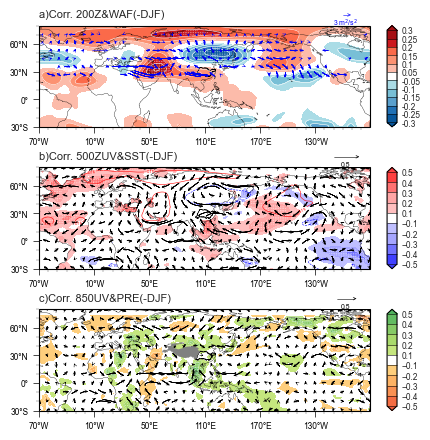

 33%|███▎      | 1/3 [02:10<04:20, 130.42s/it]D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 158/158 [00:00<00:00, 395.85条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 443/443 [00:00<00:00, 541.86条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:01<00:00, 395.00条/s]


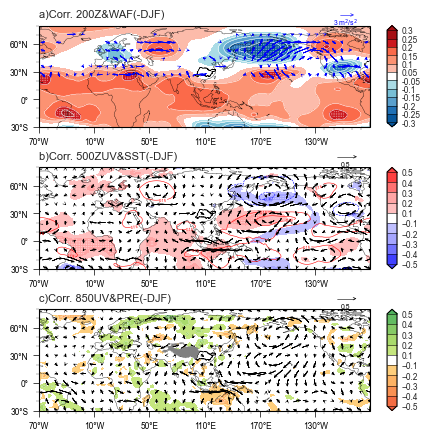

 67%|██████▋   | 2/3 [04:04<02:00, 120.55s/it]D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 189/189 [00:00<00:00, 340.90条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 442/442 [00:00<00:00, 505.88条/s]
D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:213: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)

绘制曲轴矢量: 100%|██████████| 443/443 [00:00<00:00, 534.04条/s]


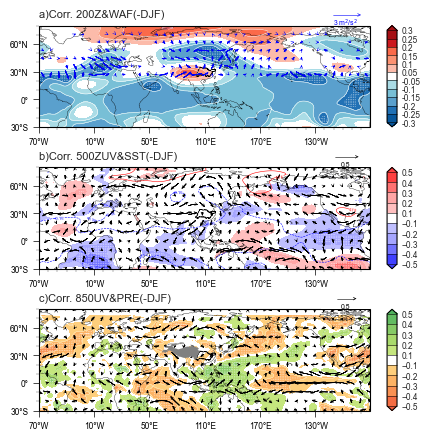

100%|██████████| 3/3 [05:59<00:00, 119.94s/it]


In [6]:
# 冬季超前相关
def lead_crossyear(data):
    Z = data.sel(time=slice('1960-03-01', '2022-11-30'))
    # 提取时间的年份和月份
    month = Z['time.month']
    Z_winter = Z.sel(time=month.isin([12, 1, 2]))
    year = Z_winter['time.year']
    month = Z_winter['time.month']
    # 创建一个新的年份坐标，对于12月，年份加1
    winter_year = year.where(month != 12, year + 1)
    Z_winter_avg = Z_winter.groupby(winter_year).mean('time')
    return Z_winter_avg

Z = lead_crossyear(z).transpose('year', 'level', 'lat', 'lon')
U = lead_crossyear(u).transpose('year', 'level', 'lat', 'lon')
V = lead_crossyear(v).transpose('year', 'level', 'lat', 'lon')
T = lead_crossyear(t).transpose('year', 'level', 'lat', 'lon')
Pre = lead_crossyear(pre).transpose('year', 'lat', 'lon')
Sst = lead_crossyear(sst).transpose('year', 'lat', 'lon')

corr_mam = xr.open_dataset(r"D:/PyFile/p2/data/Corr_DJF.nc")
corr_z = corr_mam['corr_z']
reg_z = corr_mam['reg_z']
corr_u = corr_mam['corr_u']
corr_v = corr_mam['corr_v']
corr_t = corr_mam['corr_t']
corr_pre = corr_mam['corr_pre']
corr_sst = corr_mam['corr_sst']


def latlon_fmt(ax, xticks1, yticks1, xmajorLocator, xminorLocator, ymajorLocator, yminorLocator):
    ax.set_yticks(yticks1, crs=ccrs.PlateCarree())
    ax.set_xticks(xticks1, crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_locator(ymajorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.xaxis.set_minor_locator(xminorLocator)
    ax.tick_params(which='major', length=4, width=.5, color='black')
    ax.tick_params(which='minor', length=2, width=.2, color='black')
    ax.tick_params(which='both', bottom=True, top=False, left=True, labelbottom=True, labeltop=False)
    plt.rcParams['ytick.direction'] = 'out'
    ax.tick_params(axis='both', labelsize=6, colors='black')
from toolbar.significance_test import r_test
p_th = r_test(62, 0.1) # 62为样本量，0.1为显著性水平
# 绘图
for ipic in tq.trange(len(K_type['type'])):
    fig = plt.figure(figsize=(10, 5))
    fig.subplots_adjust(hspace=0.4)  # Increase vertical spacing between subplots
    gs = gridspec.GridSpec(3, 1)
    xticks1 = np.arange(-180, 180, 10)
    yticks1 = np.arange(-30, 81, 30)
    ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180-70))
    ax1.set_title(f"a)Corr. 200Z&WAF(-DJF)", fontsize=8, loc='left')
    ax1.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.25)
    ax1.add_geometries(Reader(r'D:\PyFile\map\self\长江_TP\长江_tp.shp').geometries(), ccrs.PlateCarree(),
                      facecolor='none', edgecolor='black', linewidth=.5)
    ax1.set_extent([-180, 180, -30, 80], crs=ccrs.PlateCarree(central_longitude=0))
    latlon_fmt(ax1, xticks1, yticks1, MultipleLocator(60), MultipleLocator(10), MultipleLocator(30), MultipleLocator(10))
    # 3Dwaf
    Uc = xr.DataArray(U['u'].sel(level=[150, 200, 500]).mean('year').data,
                        coords=[('level', [150, 200, 500]),
                                ('lat', U['lat'].data),
                                ('lon', U['lon'].data)])
    Vc = xr.DataArray(V['v'].sel(level=[150, 200, 500]).mean('year').data,
                        coords=[('level', [150, 200, 500]),
                                ('lat', V['lat'].data),
                                ('lon', V['lon'].data)])
    Tc = xr.DataArray(T['t'].sel(level=[150, 200, 500]).mean('year').data,
                        coords=[('level', [150, 200, 500]),
                                ('lat', T['lat'].data),
                                ('lon', T['lon'].data)])
    GEOa = xr.DataArray(reg_z[ipic, 1:4, :, :],
                        coords=[('level', [150, 200, 500]),
                                ('lat', U['lat'].data),
                                ('lon', U['lon'].data)])
    waf_x, waf_y, waf_z = TN_WAF_3D(Uc, Vc, GEOa, Tc)
    corr_z_, lon = add_cyclic_point(corr_z[ipic, 2, :, :], coord=Z['lon'])
    waf_contf = ax1.contourf(lon, Z['lat'], corr_z_,
                                           levels=np.array([-.3, -.25, -.2, -.15, -.1, -.05 , .05, .1, .15, .2, .25, .3]),
                                           cmap=cmaps.temp_diff_18lev[2:-2],
                                           extend='both',
                                           transform=ccrs.PlateCarree(central_longitude=0))
    waf_cont = ax1.contour(lon, Z['lat'], corr_z_, colors='white', levels=[-.3, -.25, -.2, -.15, -.1, .1, .15, .2, .25, .3], linestyles='solid', linewidths=0.4, transform=ccrs.PlateCarree(central_longitude=0))
    p_test = np.where(np.abs(corr_z_) > p_th, 0, np.nan)
    ax1.quiver(lon, Z['lat'], p_test, p_test, transform=ccrs.PlateCarree(central_longitude=0), color='w', scale=20, headlength=2, headaxislength=2, regrid_shape=60)
    waf_speed = np.sqrt(waf_x[1] ** 2 + waf_y[1] ** 2)
    waf_speed_50 = np.nanpercentile(waf_speed, 50)
    waf_speed_mask = np.where(waf_speed > waf_speed_50, 1, 0)
    waf_x_mask = waf_speed_mask * waf_x[1]
    waf_y_mask = waf_speed_mask * waf_y[1]
    WAF_cq = Curlyquiver(ax1, waf_x['lon'], waf_x['lat'][:180],
                                  waf_x_mask[:180, :], waf_y_mask[:180, :],
                                  regrid=10, lon_trunc=-70, arrowsize=.5, scale=10, linewidth=0.4,
                                  color='blue', transform=ccrs.PlateCarree(central_longitude=0), )
    WAF_cq.key(fig, U=3, label='3 m$^2$/s$^2$', ud=7.7, edgecolor='none')
    # 边框显示为黑色
    ax1.grid(False)
    for spine in ax1.spines.values():
        spine.set_edgecolor('black')
    # 色标
    ax1_colorbar = inset_axes(ax1, width="3%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax1.transAxes, borderpad=0)
    cb1 = plt.colorbar(waf_contf, cax=ax1_colorbar, orientation='vertical', drawedges=True)
    cb1.outline.set_edgecolor('black')  # 将colorbar边框调为黑色
    cb1.dividers.set_color('black') # 将colorbar内间隔线调为黑色
    cb1.locator = ticker.FixedLocator(np.array([-.3, -.25, -.2, -.15, -.1, -.05 , .05, .1, .15, .2, .25, .3]))
    cb1.set_ticklabels(['-0.3', '-0.25', '-0.2', '-0.15', '-0.1', '-0.05', '0.05', '0.1','0.15','0.2','0.25','0.3'])
    cb1.ax.tick_params(length=0, labelsize=6)  # length为刻度线的长度

    ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree(central_longitude=180-70))
    ax2.set_title(f"b)Corr. 500ZUV&SST(-DJF)", fontsize=8, loc='left')
    ax2.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.25)
    ax2.add_geometries(Reader(r'D:\PyFile\map\self\长江_TP\长江_tp.shp').geometries(), ccrs.PlateCarree(),facecolor='none', edgecolor='black', linewidth=.5)
    ax2.set_extent([-180, 180, -30, 80], crs=ccrs.PlateCarree(central_longitude=0))
    latlon_fmt(ax2, xticks1, yticks1, MultipleLocator(60), MultipleLocator(10), MultipleLocator(30), MultipleLocator(10))
    # z
    z_high = ax2.contour(Z['lon'], Z['lat'], corr_z[ipic, 3, :, :], colors='red', levels=[.15, .3], linewidths=0.4, transform=ccrs.PlateCarree(central_longitude=0))
    z_low = ax2.contour(Z['lon'], Z['lat'], corr_z[ipic, 3, :, :], colors='blue', levels=[-.3, -.15], linewidths=0.4, transform=ccrs.PlateCarree(central_longitude=0))
    z_high.clabel(inline=1, fontsize=3)
    z_low.clabel(inline=1, fontsize=3)
    corr_sst_, lon = add_cyclic_point(corr_sst[ipic, :, :], coord=Sst['lon'])
    # sst
    sst_ = ax2.contourf(lon, Sst['lat'], corr_sst_, cmap=cmaps.GMT_polar[2:10] + cmaps.CBR_wet[0] + cmaps.GMT_polar[10:-2], levels=[-.5, -.4, -.3, -.2, -.1, .1, .2, .3, .4, .5], extend='both', transform=ccrs.PlateCarree(central_longitude=0))
    p_test = np.where(np.abs(corr_sst_) > p_th, 0, np.nan)
    ax2.quiver(lon, Sst['lat'], p_test, p_test, transform=ccrs.PlateCarree(central_longitude=0), color='w', scale=20, headlength=2, headaxislength=2, regrid_shape=60)
    # wind
    wind = Curlyquiver(ax2, U['lon'], U['lat'], corr_u[ipic, 3, :, :], corr_v[ipic, 3, :, :],
                                  lon_trunc=-70, arrowsize=.5, scale=20, linewidth=0.4, regrid=12,
                                  transform=ccrs.PlateCarree(central_longitude=0))
    wind.key(fig, U=0.5, label='0.5', ud=7.7, edgecolor='none')
    # 边框显示为黑色
    ax2.grid(False)
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')
    # 色条
    ax2_colorbar = inset_axes(ax2, width="3%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax2.transAxes, borderpad=0)
    cb2 = plt.colorbar(sst_, cax=ax2_colorbar, orientation='vertical', drawedges=True)
    cb2.outline.set_edgecolor('black')  # 将colorbar边框调为黑色
    cb2.dividers.set_color('black') # 将colorbar内间隔线调为黑色
    cb2.ax.tick_params(length=0, labelsize=6)  # length为刻度线的长度

    ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree(central_longitude=180-70))
    ax3.set_title(f"c)Corr. 850UV&PRE(-DJF)", fontsize=8, loc='left')
    ax3.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.25)
    ax3.add_geometries(Reader(r'D:\PyFile\map\self\长江_TP\长江_tp.shp').geometries(), ccrs.PlateCarree(),facecolor='none', edgecolor='black', linewidth=.5)
    ax3.add_geometries(Reader(r'D:\PyFile\map\地图边界数据\青藏高原边界数据总集\TPBoundary_2500m\TPBoundary_2500m.shp').geometries(),
                                   ccrs.PlateCarree(), facecolor='gray', edgecolor='gray', linewidth=.1, hatch='.', zorder=10)
    ax3.set_extent([-180, 180, -30, 80], crs=ccrs.PlateCarree(central_longitude=0))
    latlon_fmt(ax3, xticks1, yticks1, MultipleLocator(60), MultipleLocator(10), MultipleLocator(30), MultipleLocator(10))
    corr_pre_, lon = add_cyclic_point(corr_pre[ipic, :, :], coord=Pre['lon'])
    # pre
    pre_ = ax3.contourf(lon, Pre['lat'], corr_pre_, cmap=cmaps.MPL_RdYlGn[22+0:56] + cmaps.CBR_wet[0] + cmaps.MPL_RdYlGn[72:106-0], levels=[-.5, -.4, -.3, -.2, -.1, .1, .2, .3, .4, .5], extend='both', transform=ccrs.PlateCarree(central_longitude=0))
    pre_edge = ax3.contour(lon, Pre['lat'], corr_pre_, colors='white', levels=[-.5, -.4, -.3, -.2, .2, .3, .4, .5], linestyles='solid',linewidths=0.2, transform=ccrs.PlateCarree(central_longitude=0))
    p_test = np.where(np.abs(corr_pre_) > p_th, 0, np.nan)
    ax3.quiver(lon, Pre['lat'], p_test, p_test, transform=ccrs.PlateCarree(central_longitude=0), color='w', scale=20, headlength=2, headaxislength=2, regrid_shape=60)
    # wind
    wind = Curlyquiver(ax3, U['lon'], U['lat'], corr_u[ipic, 4, :, :], corr_v[ipic, 4, :, :],
                                  lon_trunc=-70, arrowsize=.5, scale=20, linewidth=0.4, regrid=12,
                                  transform=ccrs.PlateCarree(central_longitude=0))
    wind.key(fig, U=0.5, label='0.5', ud=7.7, edgecolor='none')
    # 边框显示为黑色
    ax3.grid(False)
    for spine in ax3.spines.values():
        spine.set_edgecolor('black')
    # 色条
    ax3_colorbar = inset_axes(ax3, width="3%", height="100%", loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax3.transAxes, borderpad=0)
    cb3 = plt.colorbar(pre_, cax=ax3_colorbar, orientation='vertical', drawedges=True)
    cb3.outline.set_edgecolor('black')  # 将colorbar边框调为黑色
    cb3.dividers.set_color('black') # 将colorbar内间隔线调为黑色
    cb3.ax.tick_params(length=0, labelsize=6)  # length为刻度线的长度
    plt.savefig(f'D:/PyFile/p2/pic/前期uvsst(-DJF)相关{ipic}.png', dpi=600, bbox_inches='tight')
    plt.show()